In [1]:
from GG_mthesis import *
%matplotlib inline

In [2]:
sns.set_style('whitegrid')
sns.set_palette('colorblind')
sns.set(font_scale=1.2)

In [5]:
#define the path
path = '.\\data\\02_intermediate\\tsg_orchestra\\b1903933_1_reshaped.nc'

#open the dataset with the defined path
ds = xr.open_dataset(path) 

In [6]:
ds

<xarray.Dataset>
Dimensions:                 (time: 41277)
Coordinates:
    lat                     (time) float64 ...
    lon                     (time) float64 ...
    depth                   (time) float32 ...
  * time                    (time) datetime64[ns] 2017-11-08 ... 2017-12-06T15:55:59.998528
Data variables:
    SDN_CRUISE              |S80 ...
    crs                     int32 ...
    SDN_EDMO_CODE           int32 ...
    SDN_STATION             |S80 ...
    SDN_LOCAL_CDI_ID        |S80 ...
    SDN_BOT_DEPTH           (time) float32 ...
    POSITION_SEADATANET_QC  (time) float32 ...
    DEPTH_SEADATANET_QC     (time) float32 ...
    TIME_SEADATANET_QC      (time) float32 ...
    ATTNDR01_SEADATANET_QC  (time) float32 ...
    ATTNDR01                (time) float32 ...
    CNDCSG01_SEADATANET_QC  (time) float32 ...
    CNDCSG01                (time) float32 ...
    CPHLUMTF_SEADATANET_QC  (time) float32 ...
    CPHLUMTF                (time) float32 ...
    PSALSG01_SEADATANET_QC  (time) float32 ...
    PSALSG01                (time) float32 ...
    PSALSU01_SEADATANET_QC  (time) float32 ...
    PSALSU01                (time) float32 ...
    TEMPHU01_SEADATANET_QC  (time) float32 ...
    TEMPHU01                (time) float32 ...
    TEMPHU02_SEADATANET_QC  (time) float32 ...
    TEMPHU02                (time) float32 ...
    TMESSG01_SEADATANET_QC  (time) float32 ...
    TMESSG01                (time) float32 ...
Attributes:
    date_update:  2020-07-31T01:05:54+0100
    comment:      
    Conventions:  SeaDataNet_1.0 CF-1.6
    featureType:  trajectory
    title:        SeaDataNet NETCDF TRAJECTORY Climate Forecast 1.6 - GENERAT...

In [7]:
#Here I create a dataframe of each flag occurence for each variable. 
#Call the count_flags function for each QC variable.
position_QC = data.QC.count_flags(ds.POSITION_SEADATANET_QC)
depth_QC = data.QC.count_flags(ds.DEPTH_SEADATANET_QC)
time_QC = data.QC.count_flags(ds.TIME_SEADATANET_QC)
attenuation_QC = data.QC.count_flags(ds.ATTNDR01_SEADATANET_QC)
conduc_QC = data.QC.count_flags(ds.CNDCSG01_SEADATANET_QC)
cloro_QC = data.QC.count_flags(ds.CPHLUMTF_SEADATANET_QC)
PS_uncal_QC = data.QC.count_flags(ds.PSALSG01_SEADATANET_QC)
PS_cal_QC = data.QC.count_flags(ds.PSALSU01_SEADATANET_QC)
T_hull1_QC = data.QC.count_flags(ds.TEMPHU01_SEADATANET_QC)
T_hull2_QC = data.QC.count_flags(ds.TEMPHU02_SEADATANET_QC)
T_cond_QC = data.QC.count_flags(ds.TMESSG01_SEADATANET_QC)

#create an index
index = ['position_QC', 'depth_QC', 'time_QC', 'attenuation_QC', 'conduc_QC', 'cloro_QC', 'PS_uncal_QC', 'PS_cal_QC', 
         'T_hull1_QC', 'T_hull2_QC', 'T_cond_QC']

#Create a list with each QC variable count
QC =[position_QC, depth_QC, time_QC, attenuation_QC, conduc_QC, cloro_QC, PS_uncal_QC, PS_cal_QC, T_hull1_QC, 
    T_hull2_QC, T_cond_QC]

#Create the dataframe
QC_df = pd.DataFrame(QC, index=index)

In [8]:
QC_df

no_quality_control  good_value  probably_good_value  \
position_QC                      0       41189                    0   
depth_QC                         0       41277                    0   
time_QC                          0       41277                    0   
attenuation_QC                   0       25051                    0   
conduc_QC                        0       29854                    0   
cloro_QC                         0       25218                    0   
PS_uncal_QC                      0       25380                    0   
PS_cal_QC                        0       25221                    0   
T_hull1_QC                       0       25220                    0   
T_hull2_QC                       0       25220                    0   
T_cond_QC                        0       25216                    0   

                probably_bad_value  bad_value  changed_value  \
position_QC                      0          0              0   
depth_QC                         0          0              0   
time_QC                          0          0              0   
attenuation_QC                 174          0              0   
conduc_QC                     9838          0              0   
cloro_QC                         7          0              0   
PS_uncal_QC                      9          0              0   
PS_cal_QC                        8          0              0   
T_hull1_QC                       4          0              0   
T_hull2_QC                       4          0              0   
T_cond_QC                       13          0              0   

                value_below_detection  value_in_excess  interpolated_value  \
position_QC                         0                0                  88   
depth_QC                            0                0                   0   
time_QC                             0                0                   0   
attenuation_QC                      0                0                   0   
conduc_QC                           0                0                   0   
cloro_QC                            0                0                   0   
PS_uncal_QC                         0                0                   0   
PS_cal_QC                           0                0                   0   
T_hull1_QC                          0                0                   0   
T_hull2_QC                          0                0                   0   
T_cond_QC                           0                0                   0   

                missing_value  value_phenomenon_uncertain  
position_QC                 0                           0  
depth_QC                    0                           0  
time_QC                     0                           0  
attenuation_QC              0                           0  
conduc_QC                   0                           0  
cloro_QC                    0                           0  
PS_uncal_QC                 0                           0  
PS_cal_QC                   0                           0  
T_hull1_QC                  0                           0  
T_hull2_QC                  0                           0  
T_cond_QC                   0                           0

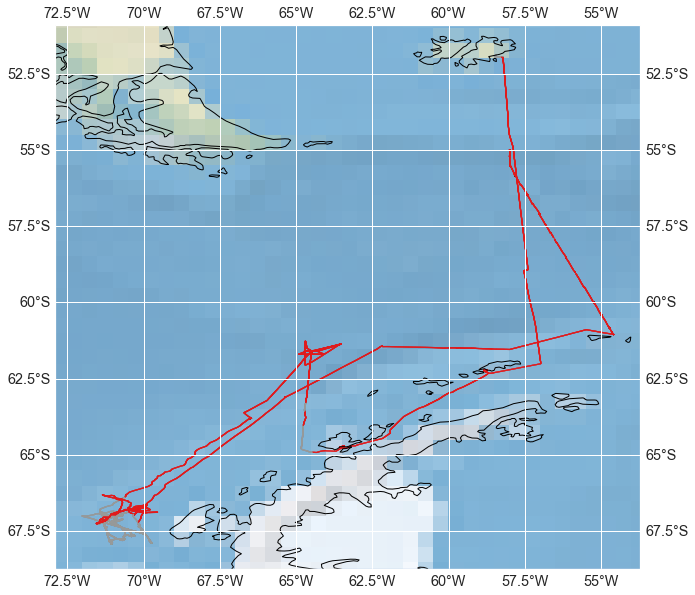

In [9]:
data.QC.cruise_map_QC(ds.CNDCSG01_SEADATANET_QC, ds.lon, ds.lat,savepath='C:\\Users\\gian_\\repos\\mthesis_gianlucca\\results\\preprocessing\\map_bad_values.png')

In [10]:
#data.QC.cruise_map_QC(ds.PSALSG01_SEADATANET_QC, ds.lon, ds.lat)

In [11]:
#data.QC.cruise_map_QC(ds.TEMPHU02_SEADATANET_QC, ds.lon, ds.lat)

In [12]:
#Drop unnecessary variables to make dataset clearer. (Drop QC variables only if they are all good)

ds = ds.drop(['SDN_CRUISE','crs','SDN_EDMO_CODE','SDN_STATION','SDN_LOCAL_CDI_ID','SDN_BOT_DEPTH','POSITION_SEADATANET_QC',
              'DEPTH_SEADATANET_QC','TIME_SEADATANET_QC','ATTNDR01_SEADATANET_QC','CNDCSG01_SEADATANET_QC',
              'CPHLUMTF_SEADATANET_QC','PSALSG01_SEADATANET_QC','PSALSU01_SEADATANET_QC','TEMPHU01_SEADATANET_QC',
              'TEMPHU02_SEADATANET_QC','TMESSG01_SEADATANET_QC'])

#depth could theroetically also be dropped as it is constant, but it is not a big burden to stay and could be nice for future
#workflows.

#I also rename the variables to more mnemonic variable names (standarised names for this workflow)

In [13]:
ds = ds.rename({'ATTNDR01':'attenuation','CNDCSG01':'conductivity_tsg','CPHLUMTF':'chl-a','PSALSG01':'sal_tsg_cal',
                'PSALSU01':'sal_tsg_nocal', 'TEMPHU01':'temp_hull_1', 'TEMPHU02':'temp_hull_2', 'TMESSG01':'temp_cond_tsg'})

In [14]:
#STEPS EXPLAINED IN FULL PREPROCESSING FILE

In [15]:
path_to = '.\\data\\02_intermediate\\tsg_orchestra\\b1903933_2_QC.nc'
ds.to_netcdf(path_to)